# Initializers Test Case

A podme vyskusat, aky ucinok budu mat rozne sposoby inicialiazcie vah na nase ukazkove priklady.

In [1]:
import numpy as np

from backstage.utils import dataset_Circles, dataset_Flower, draw_DecisionBoundary, draw_TrainingResults
from backstage.layer import Input, Dense, DropOut
from backstage.loss import CreateLossFunction
from backstage.optimizer import GradientDescent
from backstage.model import Model
from backstage.initializer import Normal, XavierNormal, HeNormal

## Test Case

Testovaci scenar bude uplne totozny so scenarom z DropOut notebooku.

In [2]:
def test_InitializersCase(mTrain, mDev, noise, layers, epochs=50000):
    np.random.seed(1)

    # Spravime dataset
    X, Y = dataset_Flower(m=mTrain, noise=noise)
    devX, devY = dataset_Flower(m=mDev, noise=noise)

    # Model
    model = Model(layers)
    model.initialize(loss=CreateLossFunction('bce'), optimizer=GradientDescent(0.03))

    # Ucime
    results = model.train(X, Y, epochs, 0, devX, devY, verboseInterval=5000)

    print('')
    print('Frobenius norms of weights: ')
    for i,l in enumerate(model.layers):
        if isinstance(l, Dense):
            print('  Layer: {0} - Weights Frobenius norm = {1}'.format((i+1), np.linalg.norm(l.W)))
    print('')

    # Kreslime vysledok
    draw_TrainingResults(results)
    draw_DecisionBoundary(devX, devY, model)

## Zakladny pripad - Normal Initializer

Pre zaciatok si vykoname ucenie s pouzitim Normal initializera - totozne s dropout test casom.

Epoch 0:  Loss = 8.7053347   Val_Loss = 5.8478412
Epoch 5000:  Loss = 0.6902560   Val_Loss = 0.6931535
Epoch 10000:  Loss = 0.6868880   Val_Loss = 0.6841131
Epoch 15000:  Loss = 0.6833072   Val_Loss = 0.6734489
Epoch 20000:  Loss = 0.6819103   Val_Loss = 0.6681488
Epoch 25000:  Loss = 0.6469935   Val_Loss = 0.6647460
Epoch 30000:  Loss = 0.6460511   Val_Loss = 0.6623561
Epoch 35000:  Loss = 0.6490499   Val_Loss = 0.6622838
Epoch 40000:  Loss = 0.6425559   Val_Loss = 0.6633743
Epoch 45000:  Loss = 0.6434320   Val_Loss = 0.6680105
Training complete.
Epoch 49999:  Loss = 0.6404547   Val_Loss = 0.6693830

Frobenius norms of weights: 
  Layer: 2 - Weights Frobenius norm = 2.9229071063617393
  Layer: 4 - Weights Frobenius norm = 5.531031118830728
  Layer: 6 - Weights Frobenius norm = 6.452696939972714
  Layer: 8 - Weights Frobenius norm = 5.813900360930521
  Layer: 10 - Weights Frobenius norm = 6.419291773470522
  Layer: 12 - Weights Frobenius norm = 5.2013152187359255
  Layer: 14 - Weights 

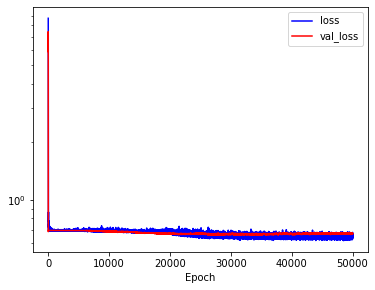

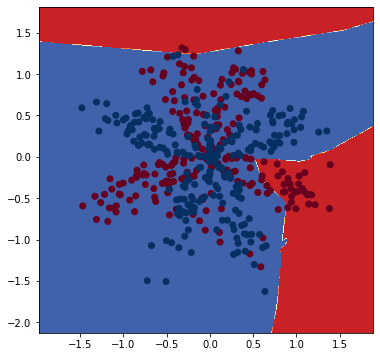

In [3]:
def test_NormalInitializer():

    layers = [Input(2)]
    for i in range(10):
        layers.append(Dense(6, act='relu', weightsInitializer=Normal()))
        layers.append(DropOut(0.2))
    layers.append(Dense(1, act='sigmoid', weightsInitializer=Normal()))

    # Train model
    test_InitializersCase(mTrain=1000, mDev=500, noise=0.3, layers=layers)

test_NormalInitializer()

## Lepsi pripad - Xavier, He

A skusme teraz to iste s pouzitim vhodnejsich inicializatorov.

Epoch 0:  Loss = 0.7594712   Val_Loss = 0.6923142
Epoch 5000:  Loss = 0.6742401   Val_Loss = 0.6715798
Epoch 10000:  Loss = 0.6401728   Val_Loss = 0.5985705
Epoch 15000:  Loss = 0.6549541   Val_Loss = 0.5954355
Epoch 20000:  Loss = 0.6428249   Val_Loss = 0.5874210
Epoch 25000:  Loss = 0.6237523   Val_Loss = 0.5711037
Epoch 30000:  Loss = 0.6326747   Val_Loss = 0.5679035
Epoch 35000:  Loss = 0.6311554   Val_Loss = 0.5659942
Epoch 40000:  Loss = 0.6215507   Val_Loss = 0.5600459
Epoch 45000:  Loss = 0.6226109   Val_Loss = 0.5589651
Training complete.
Epoch 49999:  Loss = 0.6275186   Val_Loss = 0.5481737

Frobenius norms of weights: 
  Layer: 2 - Weights Frobenius norm = 3.658333183533904
  Layer: 4 - Weights Frobenius norm = 4.251516184511885
  Layer: 6 - Weights Frobenius norm = 4.271353628019415
  Layer: 8 - Weights Frobenius norm = 3.7100223527112646
  Layer: 10 - Weights Frobenius norm = 3.932568681348756
  Layer: 12 - Weights Frobenius norm = 3.2811445798051513
  Layer: 14 - Weights 

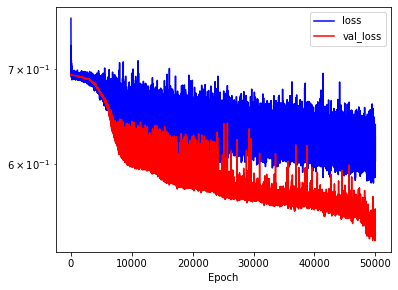

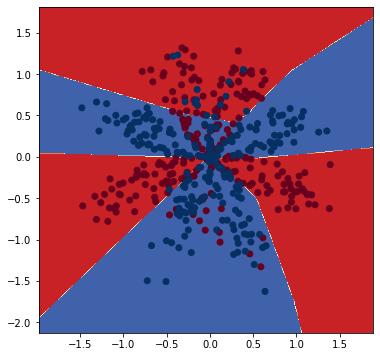

In [4]:
def test_BetterInitializer():

    layers = [Input(2)]
    for i in range(10):
        layers.append(Dense(6, act='relu', weightsInitializer=HeNormal()))
        layers.append(DropOut(0.2))
    layers.append(Dense(1, act='sigmoid', weightsInitializer=XavierNormal()))

    # Train model
    test_InitializersCase(mTrain=1000, mDev=500, noise=0.3, layers=layers)

test_BetterInitializer()